In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,17.993254,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.003704,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.359463,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.279356,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.243282,67295297
...,...,...,...,...,...,...,...
2757,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.048599,29619100
2758,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.687866,58569400
2759,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.034058,25699800
2760,2023-12-19,138.000000,138.770004,137.449997,138.100006,137.943039,20661000


In [4]:
ma_100_days = data.Close.rolling(100).mean()
ma_100_days

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2757,133.9441
2758,133.9859
2759,134.0591
2760,134.1100


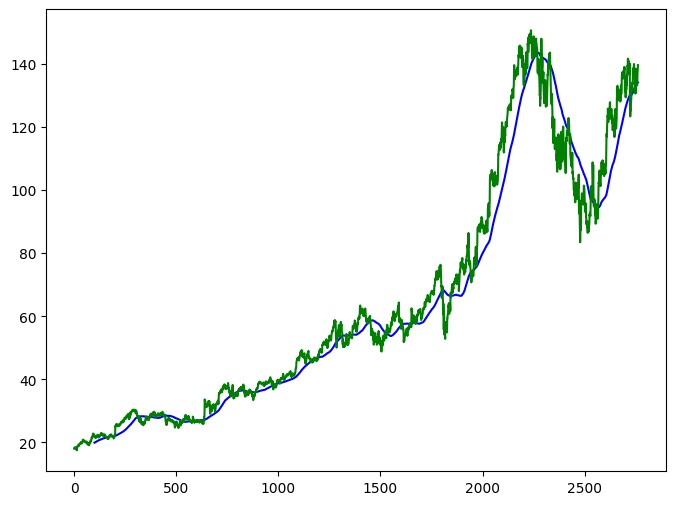

In [5]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

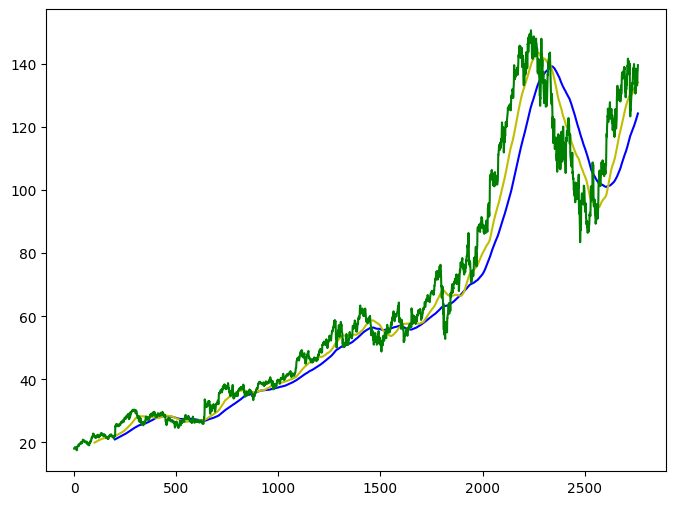

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days, 'b')
plt.plot(ma_100_days, 'y')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)* 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [10]:
data_train.shape, data_test.shape

((2209, 1), (553, 1))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [14]:
x, y = np.array(x), np.array(y)

In [15]:
import keras.layers
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [18]:
model.fit(x,y , epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - loss: 0.0454
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - loss: 0.0048
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 334ms/step - loss: 0.0036
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 314ms/step - loss: 0.0047
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 351ms/step - loss: 0.0030
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 319ms/step - loss: 0.0030
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - loss: 0.0037
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - loss: 0.0028
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 293ms/step - loss: 0.0029
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - loss: 0.0028
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 315ms/step - loss: 0.0026
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0025
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0022
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - loss: 0.0025
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [35]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])


In [36]:
data_test_scale = scaler.fit_transform(data_test)

In [37]:
x, y = np.array(x), np.array(y)

In [38]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


In [39]:
scale = 1/scaler.scale_

In [40]:
y_predict = y_predict*scale

In [41]:
y = y*scale

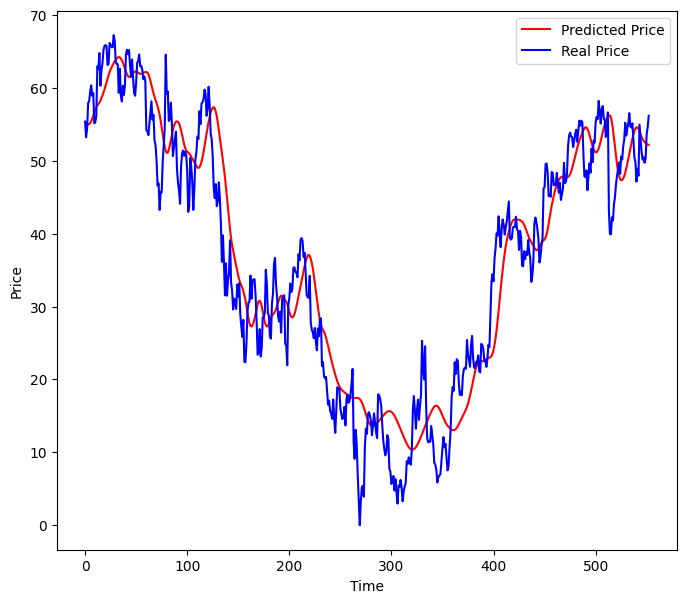

In [44]:
plt.figure(figsize = (8,7))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'b', label = 'Real Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [43]:
model.save("Stock Predictions Model.keras")